In [2]:
words = open('../names.txt', 'r').read().split()

(-0.5, 26.5, 26.5, -0.5)

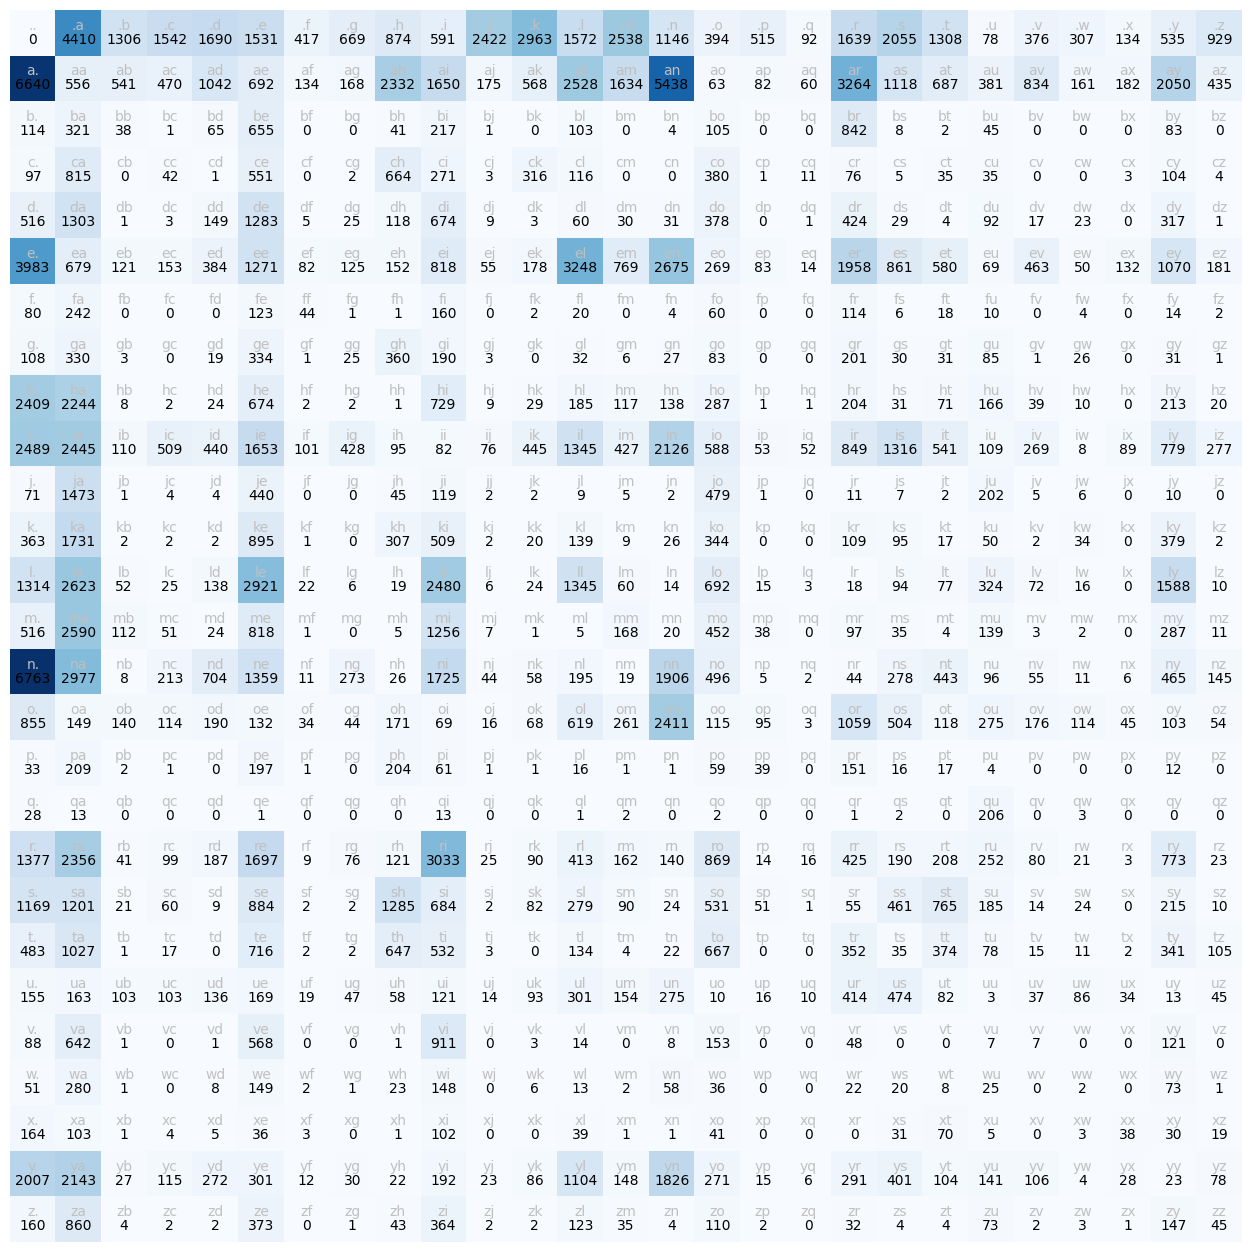

In [4]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline


N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(set("".join(words)))
stoi = {ch: i + 1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='silver')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')
plt.axis('off')

In [5]:
# setting a matrix P to storage the info from table
P = N.float()
P /= P.sum(dim=1, keepdim=True)

# generating names by bi-gram model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # p = N[ix].float()
        # p /= p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))


junide.
janasah.
p.
cony.
a.


In [12]:
# create a valuation to the above
log_likehood = 0.0
n = 0

# for w in words:
# for w in ["andrejq"]: # log-likelihood -> inf, because prob of j -> q is 0
for w in ["andrej"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likehood += logprob
        n += 1
        print(f"{ch1}->{ch2}: {prob:.4f} {logprob:.4f}")

print(f"Average log-likelihood: {log_likehood / n:.4f}")
nll = -log_likehood / n
print(f"Negative log-likelihood: {nll:.4f}")


.->a: 0.1377 -1.9829
a->n: 0.1605 -1.8296
n->d: 0.0384 -3.2594
d->r: 0.0771 -2.5620
r->e: 0.1336 -2.0127
e->j: 0.0027 -5.9171
j->q: 0.0000 -inf
q->.: 0.1029 -2.2736
Average log-likelihood: -inf
Negative log-likelihood: inf
